In [16]:
figures = join('..', 'documentation', 'figures')

## Thumbnail

In [1]:
import utils
from os.path import join

In [2]:
region = 'dennery'
region_fp = join('..', '..', 'data', region)

geojson_fp = join(region_fp, 'train-'+region+'.geojson')
image_fp = join(region_fp, region+'_ortho-cog.tif')

In [18]:
utils.thumbnail(image_fp, dec_factor = 24)

Decimation factor = 24


## Pixel based

In [81]:
from os.path import join
import os
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage import sobel
from skimage import io
from skimage.color import rgb2gray

In [82]:
# Choose an arbitrary example image
train_dir = join('..', '..', 'data', 'curated', 'roofs_train')
materials = {'concrete_cement':0, 'healthy_metal':1, 'incomplete':2, 'irregular_metal':3, 'other':4}

In [83]:
train_sample = join(train_dir, 'other', '7a307a06.tif')
img = io.imread(train_sample)

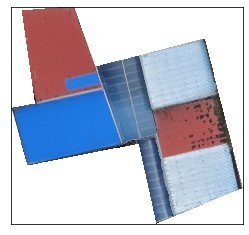

In [84]:
fig, ax = plt.subplots()
plt.imshow(img)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
fname = join(figures, 'pixel_based', 'rgb.png')
fig.savefig(fname)

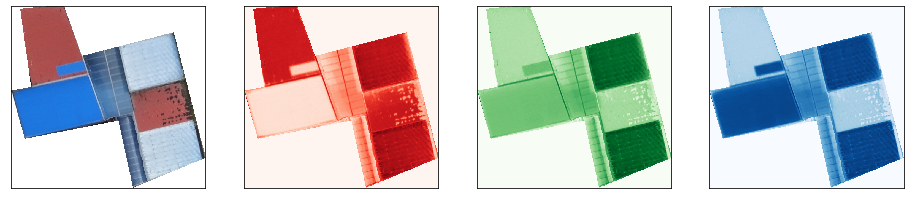

In [85]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (16, 5))


for k in [ax1, ax2, ax3, ax4]:
    k.axes.get_xaxis().set_visible(False)
    k.axes.get_yaxis().set_visible(False)

ax1.imshow(img)
ax2.imshow(img[:, :, 0], cmap='Reds')
ax3.imshow(img[:, :, 1], cmap='Greens')
ax4.imshow(img[:, :, 2], cmap='Blues')
plt.show()

fname = join(figures, 'pixel_based', 'rgb_channels.png')

fig.savefig(fname)

In [86]:
def sobel_layers(img):
    sob = np.zeros(img.shape)    
    for layer in range(img.shape[2]):
        sx = sobel(img[:, :, layer].astype('int32'), axis=0, mode='constant')
        sy = sobel(img[:, :, layer].astype('int32'), axis=1, mode='constant')
        sob[:, :, layer] = np.hypot(sx, sy)
    return sob

In [87]:
sob = sobel_layers(img)

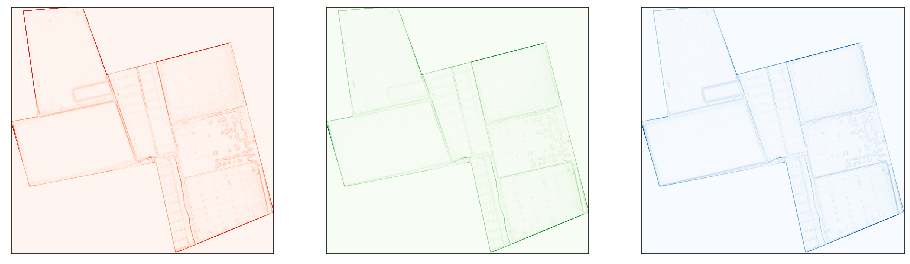

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 5))

for k in [ax1, ax2, ax3]:
    k.axes.get_xaxis().set_visible(False)
    k.axes.get_yaxis().set_visible(False)

ax1.imshow(sob[:, :, 0], cmap='Reds')
ax2.imshow(sob[:, :, 1], cmap='Greens')
ax3.imshow(sob[:, :, 2], cmap='Blues')
plt.show()

fname = join(figures, 'pixel_based', 'sobel.png')
fig.savefig(fname)

## How many of each class?

In [1]:
from os import listdir
from os.path import join

In [7]:
data_path = join('..', '..', 'data', 'all_in_one2', 'train')
materials = listdir(data_path)
total = 0
for mat in materials:
    mat_dir = join(data_path, mat)
    files = listdir(mat_dir)
    print(len(files), "roofs in ", mat)
    total = total + len(files)
print("----------")    
print("Total of ", total, " training examples")

7370 roofs in  healthy_metal
5236 roofs in  irregular_metal
193 roofs in  other
1385 roofs in  concrete_cement
668 roofs in  incomplete
----------
Total of  14852  training examples


In [2]:
test_path = join('..', '..', 'data', 'all_in_one2', 'test')
files = listdir(test_path)
print(len(files), "roofs in test set")

7320 roofs in test set
